PostId: 2018-12-27-164449
Title:サイコロ本（Foundations of Statistical Natural Language Processing）、11章〜

ファイルサイズが大きすぎ、とgithub APIに怒られたので、ブログ記事を分割。

- サイコロ本を読む、トップへ
   - [サイコロ本を読む、1〜10章](https://karino2.github.io/2018/11/07/195900.html)

<iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" frameborder="0" src="https://rcm-fe.amazon-adsystem.com/e/cm?ref=qf_sp_asin_til&t=karino203-22&m=amazon&o=9&p=8&l=as1&IS1=1&detail=1&asins=0262133601&bc1=ffffff&lt1=_top&fc1=333333&lc1=0066c0&bg1=ffffff&f=ifr"> </iframe>

# 11章 Probabilistic Context Free Grammars

文法の話。最初の所で用語やノーテーションがいろいろ出てくるので簡単にメモを取っておこう。

**dominate**

非終端のノード、$$N^j$$が、$${ { w_a} \cdot { w_b } }$$にrewriteされる時、$$N^j$$は$${ { w_a} \cdot { w_b } }$$をdominateしている、という。

また単語をあらわに書かずにdominateしている範囲（位置）だけを問題にする時は、$${ N^j}_{ a b }$$と書く。

### モデルの3つの仮定

1. 場所不変: どこをdominateしているかでrewriteの確率は変わらない
2. 文脈自由: サブツリーの確率は、ツリーの他の部分に依存しない
3. 先祖自由: サブツリーの確率は誰を親に持つかに依らない

### Chomsky Normal Formの仮定

文法は以下のどちらか

- $${ N^i} \rightarrow { { N^j} { N^k} }$$
- $${ N^i} \rightarrow { w^j}$$


## 11.3 文字列の確率

アウトサイドとインサイドの確率の再帰的な計算の話が出てくる。

インサイドは見たまんまだけどアウトサイドがややこしいので軽くメモしておく。

### アルファの定義

アウトサイドの確率、アルファは、以下のような形。

$${ \alpha_j({ p, q})} = { P({ { { w_{ 1 (p-1) }}, { { N ^j}_{ p q }}, { w_{ (q+1) m  }}}} \mid G)}$$

$$N^1$$から始めて$${ N ^j}_{ p q }$$が生成される確率、という事。

下付きの添字のjは、Nの上付きのインデックスを表す。
Nの上付きのインデックスは、1以外には特別な順番はなくて単に非終端記号のidに過ぎない。

### 11.3.3のメモ

帰納的にもっとも確率のたかい文法木のパースを得る方法の話だが、ぱっと見ものすごい計算量に見える。

Inductionのステップが凄い大変そう。
例えば一番上の分割を計算するためには、全分割での$$\delta_i({ p, q})$$が必要になる。

これってまたその先で、全分割での$$\delta_i({ p, q})$$が再帰的に必要になるので、上の方は凄い計算量だと思うんだよなぁ。これって全非終端記号の中から最大の奴を毎回探さないといけない訳で。
ボトムアップで簡単に出来ないと辛いよなぁ。

### 11.3のテーブルを手計算してみる

11.3.4のトレーニングのところで、式11.26のpreterminalのケースの式で、ベータがなんなのか良く分からなくなってきた。$$\beta_j({ p, q})$$という時は、wは所与の物を使うという前提では無いのか？すると$$\beta_j({ h, h})$$にPを掛けているのはなんなのだろう？

11.3.1まで戻ってテーブル11.3を自分で計算してみる事にする。

まずはfigure 11.1の二通りになる、という事を確認する必要があるかな。
どうしたらいいんだろう？下から始めてみるか。

まずpreterminalは一対一に対応している。

訂正: この記述は間違いで、sawはNPの可能性があるのを見落としていた。
ただsawがNPだとVがなくなるのでVPが作れず、Sには出来ない。

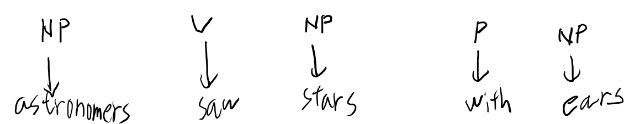

In [1]:
MeatPieImage()

次に、ルールのうち一通りしか無い物を見てみる。SからのNP VPがまず一通り。
次にPが含まれているルールはPPからP NPだけだが、Pの後ろは一つしかNPが無いのでこのルールを適用するしか無い。

Vを含むルールもVPのルールしか無いが、これはNPの側がどなるかはこの時点では決まらない。

という事でこの時点で即座に決まるのは以下か。

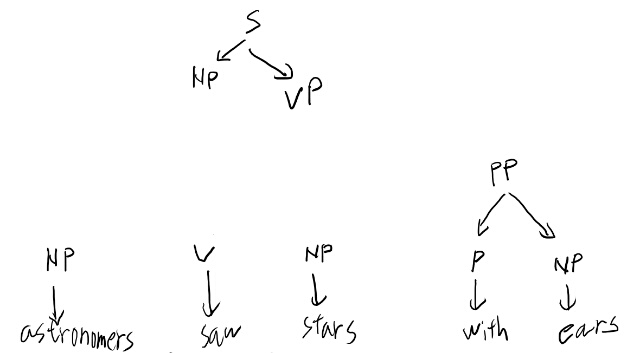

In [1]:
MeatPieImage()

VPが右に来るルールはSのところしか無いので、一番左のNPがSの左に来るのもこの時点で確定しているか。まぁいい。

で、Vの上のVPのところのNPをどうするか、というのは二通り考えられる。
まず隣のNPがVPを作る場合。

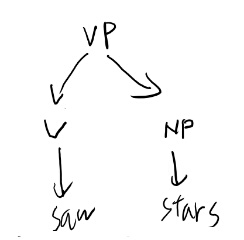

In [1]:
MeatPieImage()

もう一つの場合は隣のNPはそのさらに隣のPPと先にNPを作る場合。

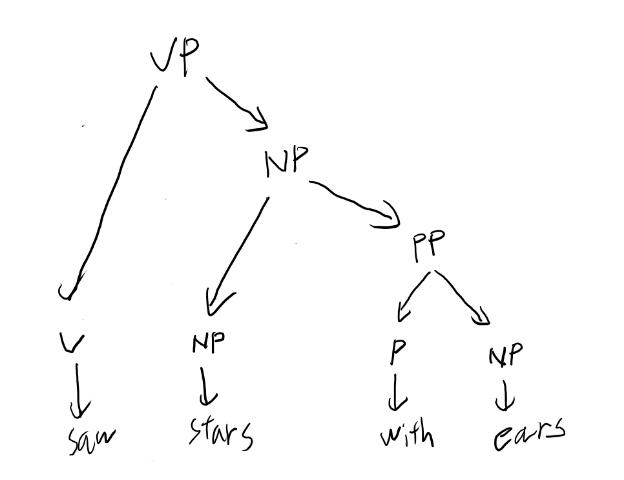

In [1]:
MeatPieImage()

ここを決めれば残りはどちらも一通りしか無くて、ツリーが決まる。これがFig 11.1の2つのツリーになる。

ここまでを考えてみると、隣同士のどれを取るか、の組み合わせ分だけツリーを考えるのがシンプルそう。
だが行き止まりになってる事もあって、その場合はそのツリーのそこから上の確率はゼロになる。これは$$\alpha_j({ p, q})$$がゼロになる、という事か。
$$\alpha_j({ p, q})$$を理解した。

さて、元の良く分からなかった11.26式を改めて見てみる。
$$\beta_j({ p, q})$$のwは所与じゃないのか？という話はやはり所与に見える。
この唐突に出てくる$$w^k$$は特定の単語を表すidだな。
つまりある単語が$$N^j$$で生成されるか、という話か。

$$P({ w_h} = { w^k})$$というのは観測結果の物だけ残す、と言ってる訳だな。
うーむ、なんかぼやっとするな。
もう少しベータの手計算を続けるか。

Table 11.3を作るにあたり、まずテーブルを書いてみよう。

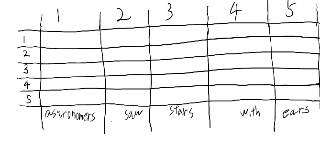

In [1]:
MeatPieImage()

このテーブルは、縦がpを、横がqを表しているんだな。
pからqまで、という順番なので、対角成分より上だけ埋まる。

対角成分はpreterminalからterminalの生成なのですぐ埋まるな。埋めてみよう。

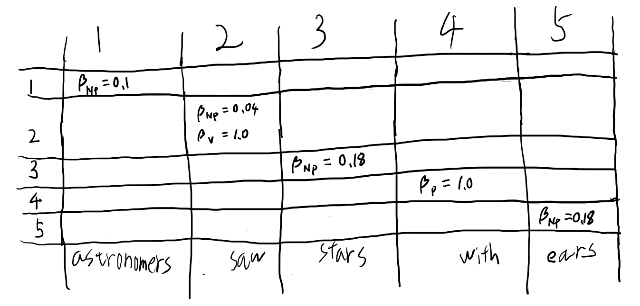

In [1]:
MeatPieImage()

$$\beta_V$$が1というのはどういう意味だろう？
Vというルールから何が生成されるのか、という事を表から見ると、sawだけだ。だから1なのか。

あるルールから何が生成されうるか、という選択肢は、全部確率を足すと1になるのだな。
ちょっと分かってきた気がする。

つまり$$\beta_j({ p, p})$$というのは、$$N^j$$から位置pにある単語が生成される確率だな。

さて、この表をさらに埋める事を考えてみよう。
例えば1, 4が空欄になってるので、どうして空欄になるかを埋めようとしてみる事で考える。

まず1から4までをなにかのルールから生成されてる、と考える。
すると最終的にはそれはpreterminalから生成されるはずなので、

- 1, 1
- 2, 2
- 3, 3
- 4, 4

は含んでいる。
さらにこのルールはチョムスキーの標準形なので、preterminal以外のルールは2つの非終端記号から出来る。

1, 4を埋めるためには、

- 1,3と4, 4
- 1, 2と3, 4
- 1, 1,と2, 4

のどれかである必要があるか。


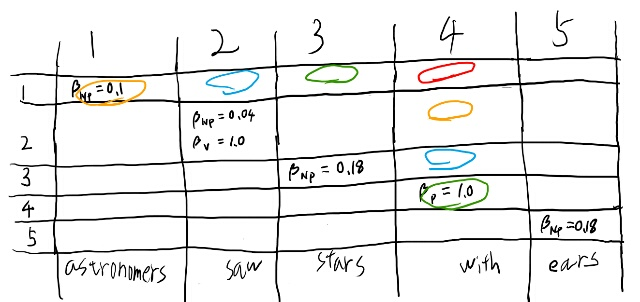

In [1]:
MeatPieImage()

つまり赤を埋めるには、対応する色のどれかの組が必要。
なるほど、目的のセルを、row側とcol側に見ていったそれぞれが要るんだな。

例えばPが右に来るルールは無いから、幾つかのセルは確率がゼロなのが分かる。
それをバツで消してみる。
ついでにPPからPのセルも埋めてみる。

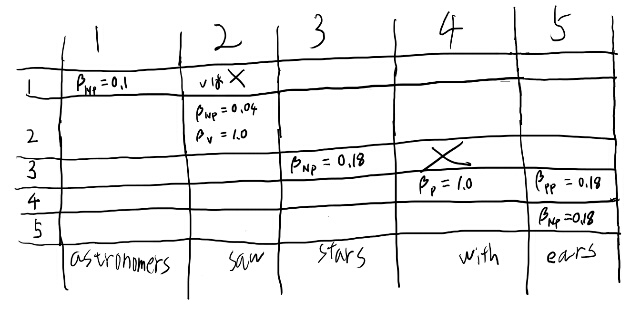

In [1]:
MeatPieImage()

一番右上のセルに注目しよう。
これは必ずNP VPなのだが、という事は下のどこかはVPじゃないと駄目、という事だよな。
で、左はNPだ。

VPのセルというのは左にVが必要。
そう考えると、一番右の列の、3から下はVPになりえない。
2がVPなのは決まるな。
すると1, 1と2, 5のセルを使うのは確定するのか。
そして2, 5のセルはVPなんだな。

では$$\beta_VP({ 2, 5})$$をどうやって求めるか考えてみよう。
ここを埋める方法は、

1. 2, 2と3, 5
2. 2, 3と4, 5
3. 2, 4と5, 5

の3通りがある。これは2, 5と言った瞬間に機械的に決まるな。
一番上は3, 5が必要。
3, 5は二通りか。3,3と4, 5か、または3, 4と5, 5。
そして3, 4は無いから3, 3と4, 5か。

これはNPからNPとPPが出来るルールだな。

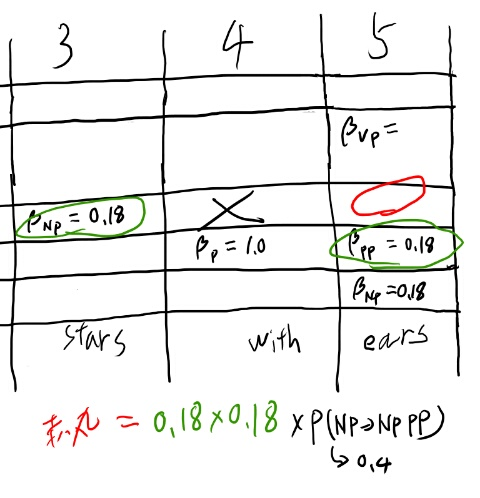

In [1]:
MeatPieImage()

2, 5に戻って2, 4と5, 5のケースを考えてたら、2, 4ってありえない気がしてきた。

まず3, 4がありえない。すると、2, 4というのは2, 3と4, 4になるが、4, 4はPなのでPが右側に出るルールが必要で、それは無い。

そうすると1, 4も無いんじゃないか？
1, 4は2, 4と3, 4が無いので、1, 3と 4, 4しか残らない。そしてこれも右側にPが出るルールが無いと駄目。という事はこのバツは上全部うめられるのか。

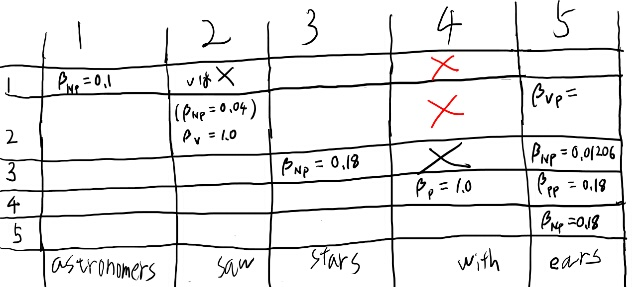

In [1]:
MeatPieImage()

あとは2, 3を埋めて2, 3のケースも求めれば2, 5は計算出来るな。
これは確かに帰納的になっている。

### 11.3.4のトレーニングの問題に戻る

さて、理解が進んだところで式11.26に戻ってみよう。
左辺で求めようとしているのは特定のpreterminalからある単語が生成される確率だ。

右辺の1つ目の式を見てみよう。
分子はh番目が$$N^j$$でdominateされる確率と、そのh番目をdominateする非終端記号から単語が生成される確率とその単語が目的の単語の同時確率となってる。
この同時確率は分かりにくいな。

$$P({ N^j} \rightarrow { w^k})$$と、$$P({ { { N^j} \rightarrow { w_h}}, { { w_h} = { w^k}}})$$の違いを考えよう。

前者は$$N^j$$から特定の単語が生成される確率だな。
これは何番目、とか関係なく、どこでもいいからこのルールが成立する確率。

後者は難しいな。アルファも掛けた式全体で、h番目の単語が$$N^j$$から生成れる確率と、そのh番目が単語$$w^k$$と一致する確率の積としいう意味だろう。

つまりアルファも掛けた分子全体で、h番目の単語が$$w^k$$で、それが$$N_j$$から生成される確率だ。

アルファを除くと、h番目のpreterminalが$$N_j$$だった時に、h番目の単語が$$w^k$$となる確率か。

それはようするに

- h番目が単語$$w^k$$なら$$P({ N^j} \rightarrow { w^k})$$
- h番目がそれ以外の単語なら0

となる何かか。わかった。つまりデルタ関数をかけた物だな。

では次の11.27を見てみよう。

分母は$$N^j$$が今対象としているセンテンスのどこかに現れる確率。

分子のシグマの中はh番目の単語が$$N^j$$から生成されて、それが$$w^k$$となる確率。

という事で11.27全体では、文章の中のどこかの$$N^j$$が、$$w^k$$を生成する確率、という意味になり、それが左辺の表すところであろう。（厳密には文がgivenの時の値であり、それが左辺の最尤推定値となっている、という事だろう）。

よし、分かった。